In [1]:
import pandas as pd
import numpy as np

In [5]:
ruta  = "Copia_de_SociedadesMorosasIPJ2017_2018_2019_al_26022019.xlsx" #ruta del archivo

In [7]:
pwd 

'C:\\Users\\jonva\\GitHub\\PyDa_Nov2019'

In [11]:
cd C:\\Users\\jonva\\GitHub\\PyDa_Nov2019\\Datos

C:\Users\jonva\GitHub\PyDa_Nov2019\Datos


In [37]:
morosos_raw = pd.read_excel(ruta)

In [ ]:
morosos = morosos_raw

In [ ]:
type(morosos)--

pandas.core.frame.DataFrame

In [19]:
morosos.shape

(74189, 11)

In [34]:
morosos = morosos.drop(morosos.tail(5).index).drop(morosos.columns[[7,8,9,10]], axis=1)

In [40]:
morosos.head()

,Cedula,Nombre,Nombre del representante legal,Cédula representante legal,Monto Deuda 2017,Monto Deuda 2018,Monto Deuda 2019
0,3012000643,ALLIANCE ASSURANCE COMPANY LIMITED,NaN,NaN,21368,64650,66930
1,3012000659,S CHAIGNEAU HA,NaN,NaN,21368,64650,66930
2,3012000680,ISAAC Y SAMUEL,NaN,NaN,21368,64650,66930
3,3012000730,J J JULIA Y CO CENTRAL AMERICAN DEPARTAMENT IN...,NaN,NaN,21368,64650,66930
4,3012000741,ALBINGIA S A,NaN,NaN,21368,64650,66930


In [42]:
for col in morosos.columns:
    print(col, '\n', morosos[col].value_counts().head(10),'\n')

Cedula 
 3101080760    2
3101687806    1
3101624439    1
3102325120    1
3101396356    1
3101076246    1
3101207319    1
3101731608    1
3101338393    1
3101600538    1
Name: Cedula, dtype: int64 

Nombre 
 BIO PRODUCTS LABORATORY BPL                         2
THE MENNEN COMPANY                                  2
PRODUCTOS ALIMENTICIOS IMPERIAL SOCIEDAD ANONIMA    2
ALFA OMEGA INTERNATIONAL S A                        2
US BANK NATIONAL ASSOCIATION                        2
LIBERTY INVESTMENTS INC                             2
IRAZEMI S A                                         2
YA GLOBAL INVESTMENTS,L.P.                          2
AMBIANCK SOCIEDAD ANONIMA                           2
PRIMEWAY S.A.                                       2
Name: Nombre, dtype: int64 

Nombre del representante legal 
 KAIULANI SCHULER                      68
CLAUDIO SANTIAGO QUESADA PORTUGUEZ    63
SONIA MONGE BASTOS                    62
VICENTE LUIS AGRAMUNT CIURANA         48
RICARDO ENRIQUE SAMANIEGO A

In [41]:
columns = ['Monto Deuda 2017', 'Monto Deuda 2018', 'Monto Deuda 2019']

for col in columns:
  morosos[col]=morosos[col].replace('Omiso Renta', np.nan)  

In [49]:
morosos_melt = pd.melt(morosos, 
                       id_vars=('Cedula',
                                'Nombre',
                                'Nombre del representante legal',
                                'Cédula representante legal'),
                      var_name='Periodo',
                      value_name='Deuda')

In [50]:
morosos_melt.head()

,Cedula,Nombre,Nombre del representante legal,Cédula representante legal,Periodo,Deuda
0,3012000643,ALLIANCE ASSURANCE COMPANY LIMITED,NaN,NaN,Monto Deuda 2017,21368.0
1,3012000659,S CHAIGNEAU HA,NaN,NaN,Monto Deuda 2017,21368.0
2,3012000680,ISAAC Y SAMUEL,NaN,NaN,Monto Deuda 2017,21368.0
3,3012000730,J J JULIA Y CO CENTRAL AMERICAN DEPARTAMENT IN...,NaN,NaN,Monto Deuda 2017,21368.0
4,3012000741,ALBINGIA S A,NaN,NaN,Monto Deuda 2017,21368.0


In [51]:
morosos_melt['Periodo']=morosos_melt['Periodo'].replace(['Monto Deuda 2017',
                                                         'Monto Deuda 2018',
                                                         'Monto Deuda 2019'],
                                                        [2017,
                                                         2018,
                                                         2019])

In [52]:
morosos_melt.head()

,Cedula,Nombre,Nombre del representante legal,Cédula representante legal,Periodo,Deuda
0,3012000643,ALLIANCE ASSURANCE COMPANY LIMITED,NaN,NaN,2017,21368.0
1,3012000659,S CHAIGNEAU HA,NaN,NaN,2017,21368.0
2,3012000680,ISAAC Y SAMUEL,NaN,NaN,2017,21368.0
3,3012000730,J J JULIA Y CO CENTRAL AMERICAN DEPARTAMENT IN...,NaN,NaN,2017,21368.0
4,3012000741,ALBINGIA S A,NaN,NaN,2017,21368.0


In [54]:
grupo_morosos = morosos_melt['Deuda'].groupby(morosos_melt['Periodo'])

In [62]:
grupo_morosos.sum()

Periodo
2017   1568512149.00000
2018   4604911750.00000
2019   4488816620.00000
Name: Deuda, dtype: float64

In [72]:
morosos_melt[(morosos_melt['Periodo']==2017) | 
             (morosos_melt['Periodo']==2018)].loc[:,['Nombre', 'Deuda']]

,Nombre,Deuda
0,ALLIANCE ASSURANCE COMPANY LIMITED,21368.00000
1,S CHAIGNEAU HA,21368.00000
2,ISAAC Y SAMUEL,21368.00000
3,J J JULIA Y CO CENTRAL AMERICAN DEPARTAMENT IN...,21368.00000
4,ALBINGIA S A,21368.00000
5,THE AGUACATE MINES,21368.00000
6,MONTEZUMA MINES OF COSTA RICA,21368.00000
7,SANGUINETTI Y CO,21368.00000
8,SINGER SEWING MACHINE COMPANY,21368.00000
9,COSTA RICA BANANEN PLANTAGENGESELLSCHAFT LTDA,21368.00000


In [73]:
morosos['suma'] = morosos['Monto Deuda 2017'] + morosos['Monto Deuda 2018'] + morosos['Monto Deuda 2019']

In [74]:
morosos.head()

,Cedula,Nombre,Nombre del representante legal,Cédula representante legal,Monto Deuda 2017,Monto Deuda 2018,Monto Deuda 2019,suma
0,3012000643,ALLIANCE ASSURANCE COMPANY LIMITED,NaN,NaN,21368.00000,64650.00000,66930.00000,152948.00000
1,3012000659,S CHAIGNEAU HA,NaN,NaN,21368.00000,64650.00000,66930.00000,152948.00000
2,3012000680,ISAAC Y SAMUEL,NaN,NaN,21368.00000,64650.00000,66930.00000,152948.00000
3,3012000730,J J JULIA Y CO CENTRAL AMERICAN DEPARTAMENT IN...,NaN,NaN,21368.00000,64650.00000,66930.00000,152948.00000
4,3012000741,ALBINGIA S A,NaN,NaN,21368.00000,64650.00000,66930.00000,152948.00000


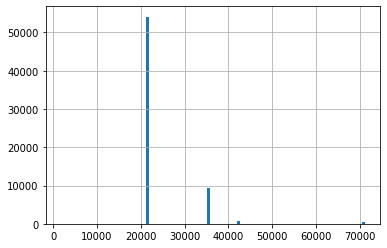

In [77]:
hist = morosos_melt[morosos_melt['Periodo']==2017]['Deuda'].hist(bins=100)